Processed Feature Set (First 5 Rows):
   Unnamed: 0       dur  spkts  dpkts  sbytes  dbytes         rate  sttl  \
0       40000  0.012996     16     18    1540    1644  2539.242797    31   
1       40001  0.004119     12     12    1064    2260  5583.879675    31   
2       40002  0.000988      2      2     146     178  3036.437382    31   
3       40003  3.415787    230    238   24344   29556   136.718127    31   
4       40004  0.193943     72     74    4238   63618   747.642372    31   

   dttl         sload  ...  service_pop3  service_radius  service_smtp  \
0    29  8.888889e+05  ...         False           False         False   
1    29  1.895606e+06  ...         False           False         False   
2    29  5.910931e+05  ...         False           False         False   
3    29  5.676935e+04  ...         False           False         False   
4    29  1.724218e+05  ...         False           False         False   

   service_snmp  service_ssh  service_ssl  state_FIN  state_

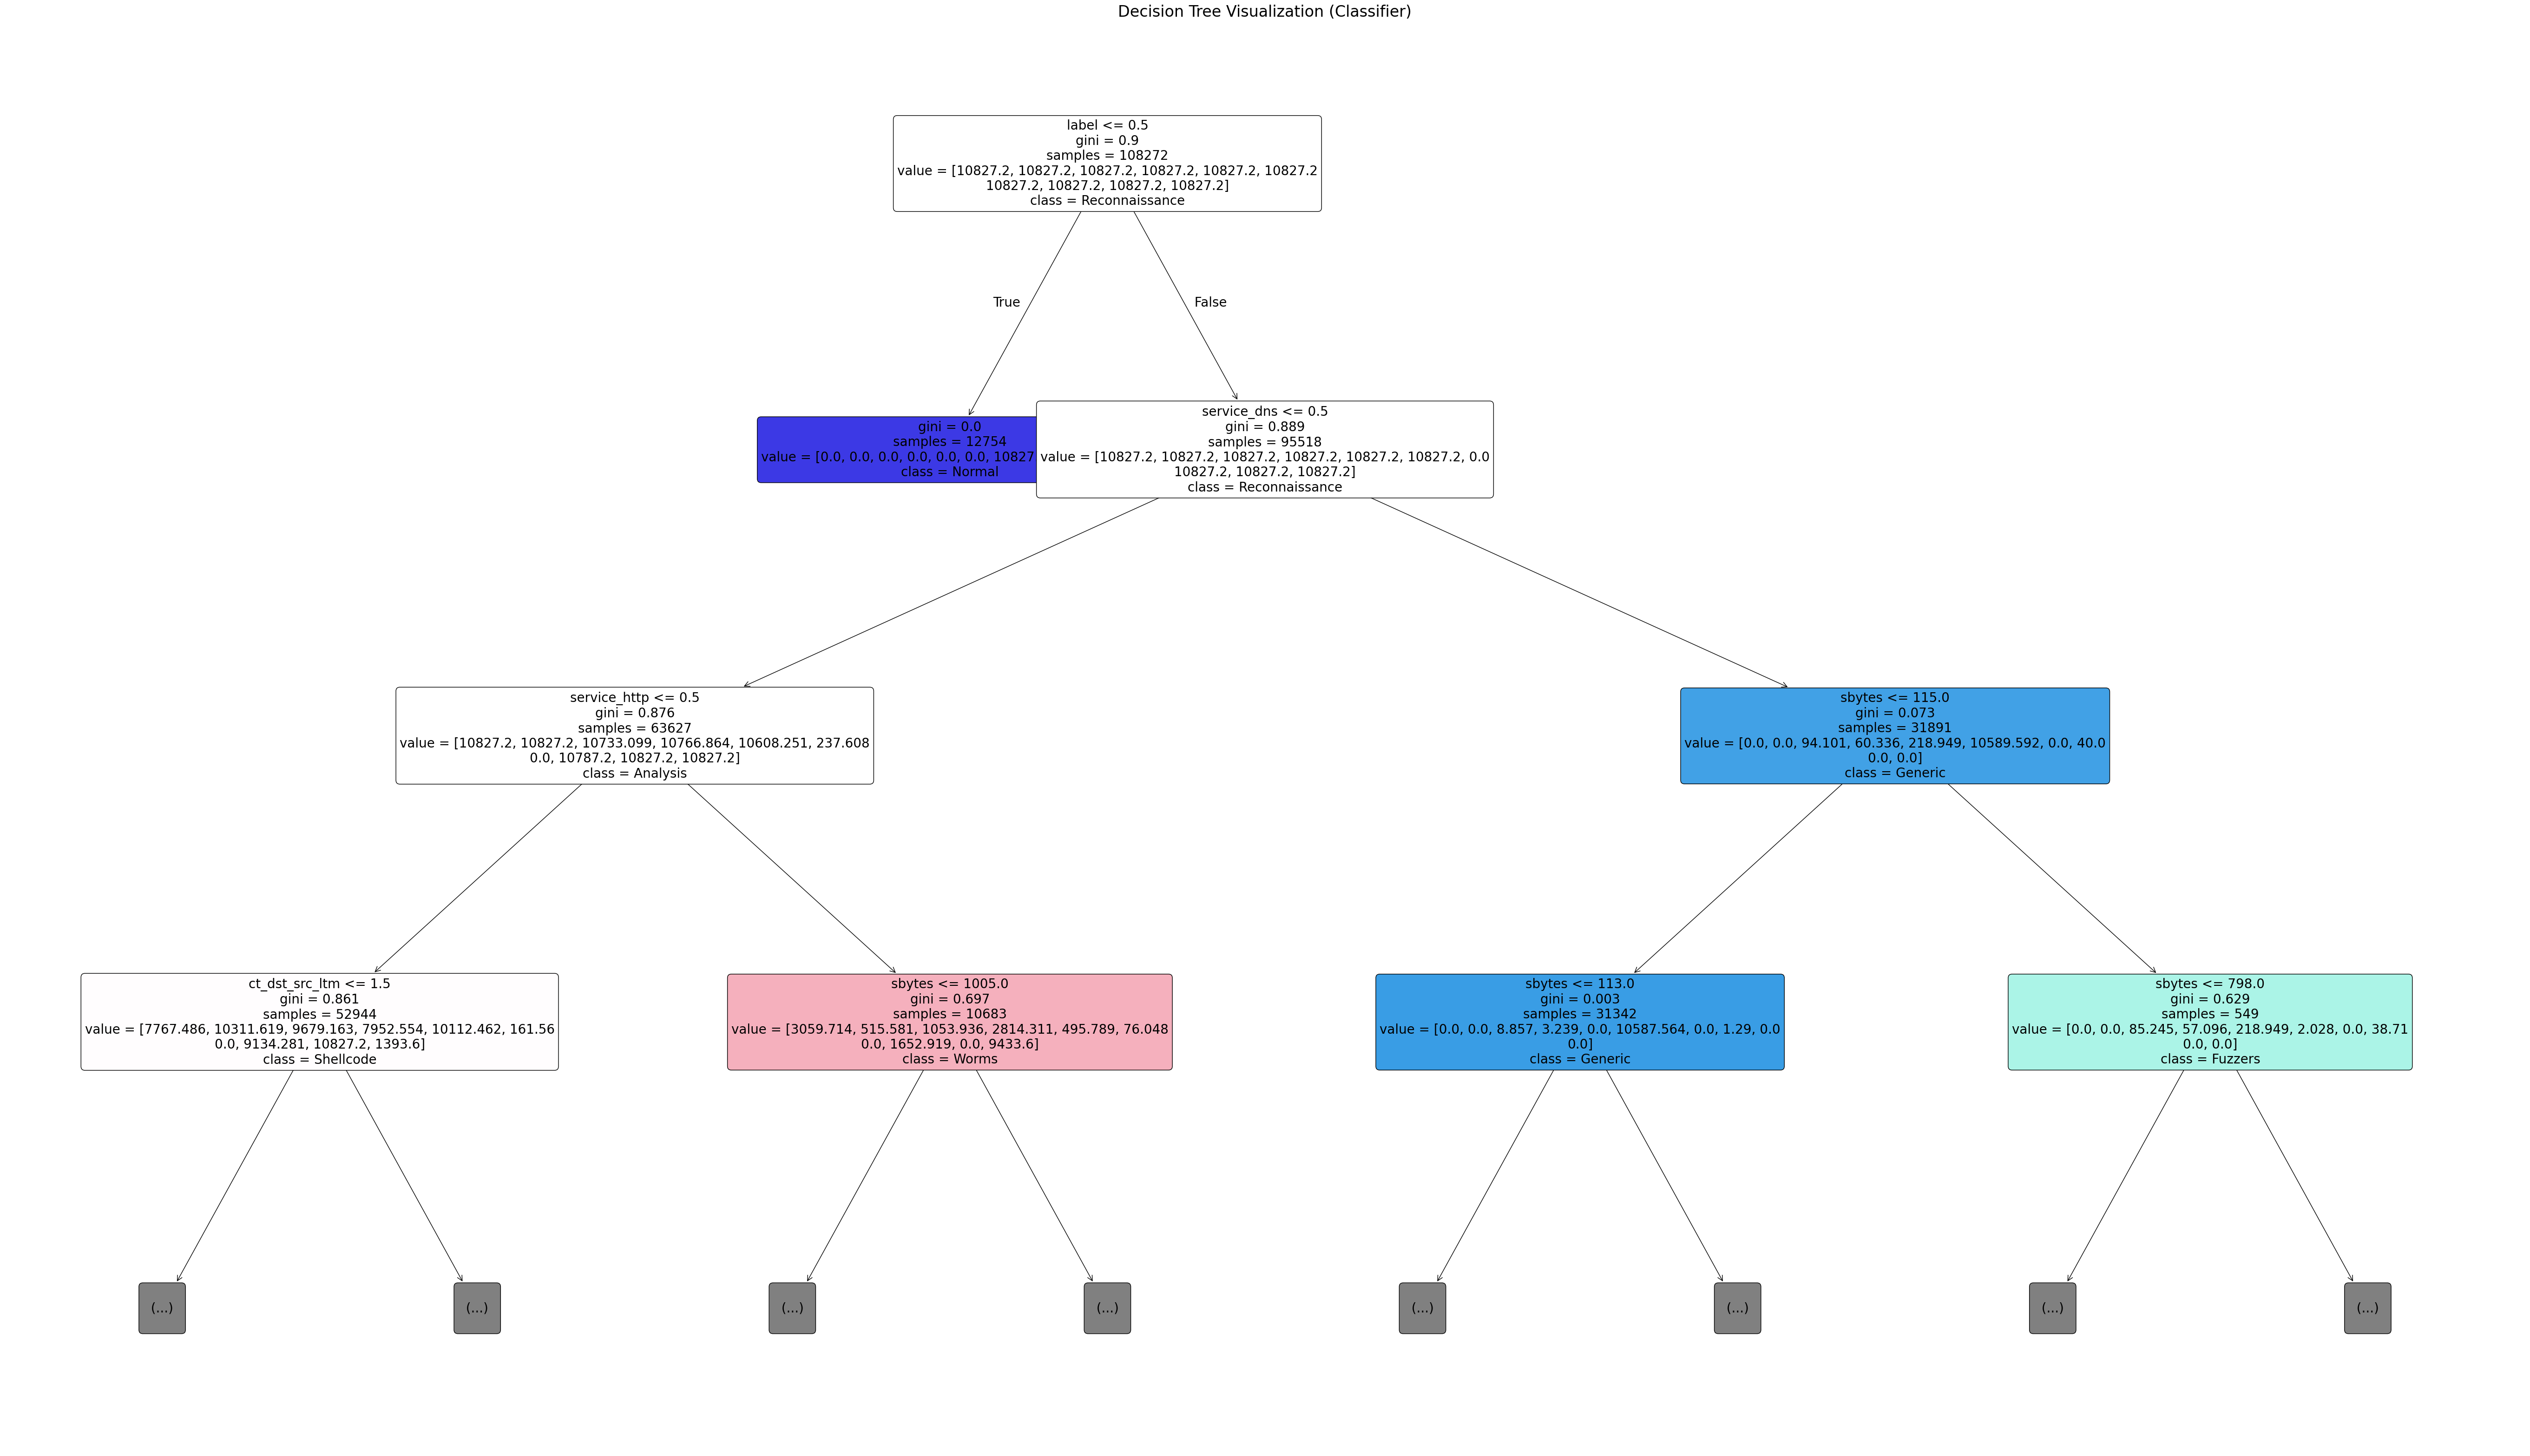

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    f1_score,
    recall_score,
    matthews_corrcoef,
    roc_auc_score,
)

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data.drop(columns=['id'], errors='ignore', inplace=True)

    # Encode target column
    label_encoder = LabelEncoder()
    data['attack_cat_encoded'] = label_encoder.fit_transform(data['attack_cat'])
    data.drop(columns=['attack_cat'], errors='ignore', inplace=True)

    # Separate features and target
    X = data.drop(columns=['attack_cat_encoded'], errors='ignore')
    y = data['attack_cat_encoded']

    # Fill missing values and one-hot encode categorical features
    X.fillna(0, inplace=True)
    X = pd.get_dummies(X, drop_first=True)

    return X, y, label_encoder

# Train a Decision Tree Classifier
def train_decision_tree(X, y, max_depth=None, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    classifier = DecisionTreeClassifier(
        random_state=random_state, class_weight="balanced", max_depth=max_depth
    )
    classifier.fit(X_train, y_train)

    return classifier, X_train, X_test, y_train, y_test

# Evaluate model performance
def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)

    f1 = f1_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

    print("\nPerformance Metrics:")
    print(f"F1 Score (Test Set): {f1:.3f}")
    print(f"Recall Rate (Test Set): {recall:.3f}")
    print(f"MCC (Test Set): {mcc:.3f}")
    print(f"AUC (Test Set): {auc:.3f}")

# Visualize the decision tree
def visualize_decision_tree(classifier, feature_names, class_names):
    plt.figure(figsize=(70, 40))
    plot_tree(
        classifier,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=20,
        max_depth=3
    )
    plt.title("Decision Tree Visualization (Classifier)", fontsize=24)
    plt.show()

# Main program
if __name__ == "__main__":
    file_path = "Threats (1).csv"

    # Step 1: Load and preprocess the data
    X, y, label_encoder = load_and_preprocess_data(file_path)
    print("Processed Feature Set (First 5 Rows):")
    print(X.head())

    # Step 2: Train the Decision Tree Classifier
    classifier, X_train, X_test, y_train, y_test = train_decision_tree(X, y, max_depth=None)

    # Step 3: Evaluate the model
    evaluate_model(classifier, X_test, y_test)

    # Step 4: Visualize the Decision Tree
    visualize_decision_tree(
        classifier,
        feature_names=X.columns,
        class_names=label_encoder.classes_
    )
